In [42]:
### DIFFERENCE BETWEEN AREAS 

In [43]:
##### 
import geopandas as gpd
import pandas as pd

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Turkiye/Mugla_Milasa_Karacahisar/progression_karacahisar_31072021.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/KaracahisarFire_new1.geojson")

# Convertir ambos atributos a datetime
gdf_shp['date_hour'] = pd.to_datetime(gdf_shp['date_hour'])
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'])

# Seleccionar columnas relevantes
df_shp = gdf_shp[['date_hour', 'Area_QGIS']]
df_json = gdf_json[['iso_timestamp', 'area_ha']]

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Ahora puedes calcular la diferencia y la media de diferencias
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)



Media de diferencias: 40.765206687359175


Media de diferencias: 40.765206687359175


/tmp/ipykernel_777013/2823953285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_777013/2823953285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)


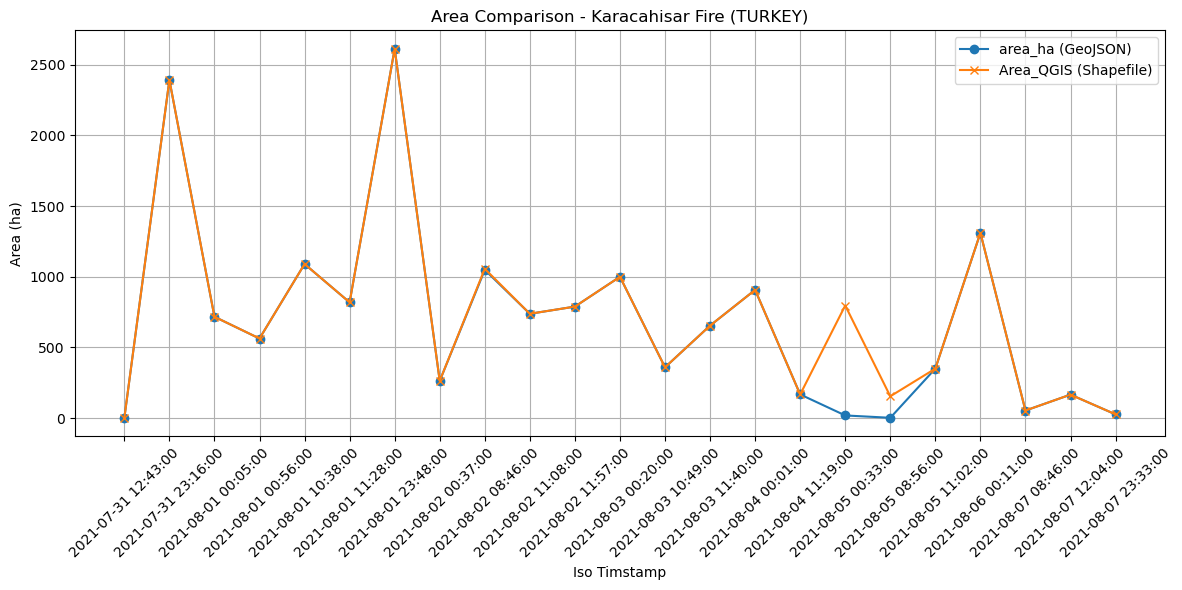

In [44]:
import matplotlib.pyplot as plt

# Reemplaza las comas por puntos y convierte a float
df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()


# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Ahora puedes calcular la diferencia y la media de diferencias
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

df_merged = df_merged.sort_values(by='date_hour')


plt.figure(figsize=(12,6))

# Posiciones numéricas equiespaciadas para X
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timstamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Karacahisar Fire (TURKEY)')
plt.legend()
plt.grid()

# Formatear etiquetas del eje X con fechas, usando las posiciones equiespaciadas
fechas = df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


